# Exploring the Link between economics and metabolic health outcomes.


#### Student name: James Walsham
#### Student ID: 16406040


# Introduction
Diabetes (Type two Diabetes Mellitus) is a chronic condition which is rapidly increasing in prevalence in New Zealand. Diabetes is a disease largely influenced by lifestyle factors such as bodyweight, exercise and nutrition. However, it is important to note that socioeconomic status may play an additive role in contributing towards metabolic diseases such as type two diabetes. To fully evaluate the reasoning behind the rising prevalence of Diabetes within New Zealand, it is important to analyse the role that socioeconomic status, inequality and government healthcare spending play in contributing towards the rise of diabetes. Since the early 90s, the New Zealand Health Survey has polled New Zealanders to evaluate their health and wellbeing. Additionally, this report aims to identify trends between the New Zealand government's healthcare spending and the economic situation of New Zealand

#### Datasets used:
1. nz-health-survey-2021-22-annual-data 

2. Current health expenditure per capita (current US$) - New Zealand

3. New Zealand General Social Survey 2008-2016

4. Wellbeing statistics: 2018

5. New Zealand Shared Prosperity Index: Annual Tracking Of National Prosperity Across Multiple Dimensions

#### Dataset sources:

Susnjak, T., Schumacher, C., Ali, A., Brook, A., Geertsema, P., Matthewson, J., Owens, R., & Smith, J. (2019). Shared Prosperity Index. Knowledge Exchange Hub, Massey University. Auckland, New Zealand. https://doi.org/10.33217/KEH/SharedProsperity/001/05.2019

New Zealand Health Survey. Ministry of Health NZ. (2022, November 18). Retrieved April 8, 2023, from https://www.health.govt.nz/nz-health-statistics/national-collections-and-surveys/surveys/new-zealand-health-survey 

Current health expenditure per capita (current US$) - New Zealand.The World Bank. (2023). Retrieved March 20, 2023, from https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD?locations=NZ&amp;most_recent_year_desc=true 

StatsNZ. (2021). General Social Survey (GSS). General Social Survey (GSS) - Stats NZ DataInfo+. Retrieved April 8, 2023, from https://datainfoplus.stats.govt.nz/Item/nz.govt.stats/2ed50ad6-8ab8-47df-883d-210a51b50043 

StatsNZ. (2019, June 19). Wellbeing statistics: 2018: Stats NZ. Wellbeing statistics: 2018 | Stats NZ. Retrieved April 8, 2023, from https://www.stats.govt.nz/information-releases/wellbeing-statistics-2018 


### Research Questions

1. What is the relationship between economic indicators and diabetes prevalence? 
2. What impact does government health spending have on the prevalence of diabetes? 
3. What is the relationship between general economic indicators and government health spending?
4. How does healthcare access impact the prevalence of diabetes?

### Executive Summary
Utilising national survey data, this report attempts to clarify the relationships between economic indicators, government health spending, and the prevalence of metabolic diseases, such as diabetes and obesity. This report clearly shows diabetes and obesity prevalence in New Zealand is not decreasing. A critical factor in the development and prevalance of diabetes found in our analyses was healthcare access, when the New Zealand population's access to general practitioner care was impeded, an increase in diabetes prevalence was observed. Although Rising government healthcare expenditure is likely dictated by the rising prevelance of chronic metabolic diseases such as diabetes and obesity, this expenditure is not entirely effective as diabetes and obesity prevalence are still increasing. Considering this, greater utilisation of The Diabetic Annual Review Scheme (bpacNZ, 20121) should be encouraged through public awareness campaigns. Additionally, free healthcare programs like Te Tumu Waiora (Codyre et al., 2021) may be highly effective in the prevention of chronic metabolic diseases. In the prevention of type two diabetes, socioeconomic factors must also be considered, with interventions targeting locations and populations of a lower socioeconomic status, or otherwise of high risk. Further research should be conducted to examine the current effectiveness of government health expenditure, aswell as programs such as Te Tumu Waiora and the Diabetic Annual Review Scheme. 

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

# Set some Pandas options as you like
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 100)
#this line enables the plots to be embedded into the notebook
%matplotlib inline

# Data Wrangling 

In [3]:
data = pd.read_excel('C:/Users/james/Downloads/shared_prosperity_assignment_dataset_mangled.xlsx', sheet_name='shared_prosperity_assignment_da')
data 

,Q5:Q1,D10:D1,D10:D1-4(Palma),P90:P10_bhc,P80:P20_bhc,P80:P50_bhc,P50:P20_bhc,GINI-BHC,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,UN_middle_class_def_inc_share,OECD_middle_class_def_inc_share,LIH_B60_contemp_median_AHC,LIH_B50_contemp_median_AHC,LIH_B50_CV_AHC,LIH_B60_CV_AHC,LIH_B40_contemp_median_AHC,LIEH_B60_contemp_median_AHC,LIEH_B50_contemp_median_AHC,...,emotional_behavioural_problems_child,adult_diabetes_rates,depression_child,excellent_very_good_or_good_parent_rated_health_child,unfilled_prescription_due_to_cost_child,unmet_need_for_after_hours_due_to_cost_child,unmet_need_for_GP_due_to_cost_child,vegetable_and_fruit_intake_child,healthy_weight_child,suicides_per_100000,problem_gambling_intervention_prevelance_percent,total_prisoners_in_remand_rate,total_sentenced_prisoners_rate,total_post_sentence_offender_population_rate,violent_crime_victimisations_rate,recorded_murders_and_homicides_per_million,regional_gdp_proportional_variation,difference_in_percent_for_low_income_by_gender,gender_pay_gap,year
0,5.09,8.03,1.21,3.87,2.52,1.66,0.66,32.2,-,-,-,19.9,54.9,19,13,22,-,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.148386,NaN,NaN,NaN,NaN,8.181108,17.119505,NaN,2.0,NaN,1994-12-31
1,4.46,6.35,1.1,3.43,2.42,1.6,0.66,30.2,-,-,-,21.3,59.5,11,6,10,-,4,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.972769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1990-12-31
2,5.94,9.75,1.44,4.26,2.67,1.64,0.62,35.1,-,-,-,18.9,57.5,20,14,13,18,9,11,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.900001,0.002756,0.284385,0.199166,0.213597,5.838588,8.439685,0.445194,1.0,10.3,2011-12-31
3,5.51,9.15,1.31,4.17,2.74,1.62,0.59,33.4,55,41,20,19,54.6,20,14,17,22,9,9,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.740197,0.100000,0.243818,0.202436,0.171839,6.188446,11.498893,0.401651,0.0,12.7,2004-12-31
4,???,???,???,???,???,???,???,???,-,-,-,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.571673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,5.61,9.1,1.36,4.14,2.59,1.62,0.63,33.8,-,-,-,19.6,57.3,20,14,11,15,10,14,7,...,4.3F,5.8,0.3Y,97.7F,3.8E,4,4.5,48.5H,63.9,12.330000,0.002645,0.281635,0.179431,0.200894,5.672671,10.654438,0.321064,2.0,12.0,2016-12-31
33,-1.5,???,???,???,???,???,???,???,-,-,-,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983-12-31
34,???,???,???,???,???,???,???,???,-,-,-,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.186182,0.000784,0.220358,0.219487,0.184163,6.264289,14.754935,0.388228,NaN,14.0,2005-12-31
35,???,???,???,???,???,???,???,???,-,-,-,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31


#### replacing all letters within the data e.g. 'C88.9' to '88.9', ',' with '.' & '???' with 'NaN'.


In [4]:
#this code stores a version of the year column prior to data cleaning, as this column does not require cleaning.
datayear = data['year']

In [5]:
#This code applies a lambda function to the entire dataset, using the expression re.sub('[^0-9\,.]+' to replace any characters..
#..which do not meet the criterea of the pattern, this pattern replaces all characters which are not letters, periods or commas...
#..this occurs due to the '^' character which excludes all of the following characters. 
data = data.applymap(lambda x: re.sub('[^0-9\,.]+', '', str(x)))
#This code replaces all instances of ',' with '.' in the dataset, such as 3432,2 with 3432.2
data = data.applymap(lambda x: re.sub(',', '.', str(x)))
#This code replaces all instances of '???' with a NaN value, rather than leaving a blank datapoint.
data = data.replace('???', np.nan)
#This code replaces all instances of '' (a blank cell) with a NaN value. 
data = data.replace('', np.nan)
#Adding in NaN values means functions like fillna work correctly.

In [6]:
#this code returns the year column to it's original form, as with the above method of data cleaning the year column was adjusted.
data['year'] = datayear

In [7]:
#cleaned data
data

,Q5:Q1,D10:D1,D10:D1-4(Palma),P90:P10_bhc,P80:P20_bhc,P80:P50_bhc,P50:P20_bhc,GINI-BHC,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,UN_middle_class_def_inc_share,OECD_middle_class_def_inc_share,LIH_B60_contemp_median_AHC,LIH_B50_contemp_median_AHC,LIH_B50_CV_AHC,LIH_B60_CV_AHC,LIH_B40_contemp_median_AHC,LIEH_B60_contemp_median_AHC,LIEH_B50_contemp_median_AHC,...,emotional_behavioural_problems_child,adult_diabetes_rates,depression_child,excellent_very_good_or_good_parent_rated_health_child,unfilled_prescription_due_to_cost_child,unmet_need_for_after_hours_due_to_cost_child,unmet_need_for_GP_due_to_cost_child,vegetable_and_fruit_intake_child,healthy_weight_child,suicides_per_100000,problem_gambling_intervention_prevelance_percent,total_prisoners_in_remand_rate,total_sentenced_prisoners_rate,total_post_sentence_offender_population_rate,violent_crime_victimisations_rate,recorded_murders_and_homicides_per_million,regional_gdp_proportional_variation,difference_in_percent_for_low_income_by_gender,gender_pay_gap,year
0,5.09,8.03,1.21,3.87,2.52,1.66,0.66,32.2,NaN,NaN,NaN,19.9,54.9,19,13,22,NaN,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1483858234262,NaN,NaN,NaN,NaN,8.18110779765849,17.1195051910757,NaN,2.0,NaN,1994-12-31
1,4.46,6.35,1.1,3.43,2.42,1.6,0.66,30.2,NaN,NaN,NaN,21.3,59.5,11,6,10,NaN,4,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.9727691986114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1990-12-31
2,5.94,9.75,1.44,4.26,2.67,1.64,0.62,35.1,NaN,NaN,NaN,18.9,57.5,20,14,13,18,9,11,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.9000006714222,0.00275630941796046,0.284385472949866,0.199165583749401,0.213596881198276,5.83858833185144,8.43968476636899,0.445194165465418,1.0,10.3,2011-12-31
3,5.51,9.15,1.31,4.17,2.74,1.62,0.59,33.4,55,41,20,19,54.6,20,14,17,22,9,9,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.740197271122,0.1,0.243818328564091,0.202435982096999,0.171839459975053,6.18844620539535,11.4988929257342,0.401650925416796,0.0,12.7,2004-12-31
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.5716733442562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,5.61,9.1,1.36,4.14,2.59,1.62,0.63,33.8,NaN,NaN,NaN,19.6,57.3,20,14,11,15,10,14,7,...,4.3,5.8,0.3,97.7,3.8,4,4.5,48.5,63.9,12.33,0.0026445225167678,0.281635260300223,0.17943149153625,0.200894282976684,5.67267113808155,10.6544382127819,0.321063824979607,2.0,12.0,2016-12-31
33,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983-12-31
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1861816669171,0.000784090909090909,0.220357833655706,0.21948742746615,0.184163442940038,6.26428916827853,14.7549350420031,0.388228129128096,NaN,14.0,2005-12-31
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31


In [8]:
#sorting the data by year to improve readability of the data. 
data = data.sort_values('year', ascending =True)

From here forward the dataset has been adjusted to only include the columns of interest. 

In [9]:
#to sort out the variables that are not of interest, I have created a new dataframe and sorted the original dataframe by this dataframe. 
variablesofinterest = ['year','adult_diabetes_rates', 'healthy_weight_adult', 'excellent_very_good_or_good_self_rated_health', 'depression_adult', 'veg_and_fruit_intake_adult', 'top_10_perc_wealth_share', 'top_5_perc_wealth_share', 'top_1_perc_wealth_share', 'health_expenditure_as_percent_of_gdp', 'health_expenditure_per_capita_PPP', 'psychological_distress_adult', 'GINI-BHC', 'unemployment_rate','P80:P20_bhc','unmet_GP_care_due_to_cost_adult']
data = data.loc[:, variablesofinterest]

### Importing missing values

In [10]:
#Importing values from https://minhealthnz.shinyapps.io/nz-health-survey-2021-22-annual-data-explorer/_w_ec2d063b/#!/explore-topics
#2018 adding in 2018 data
data.iloc[36,1] = 5.8
data.iloc[36,2] = 31.5
data.iloc[36,3] = 87.4
data.iloc[36,4] = 16.7
data.iloc[36,11] = 8.3

#Adding in past diabetes data from: https://www.health.govt.nz/nz-health-statistics/national-collections-and-surveys/surveys/new-zealand-health-survey
#1997
data.iloc[15,1] = 3.7
#2003
data.iloc[21,1] = 4.3

#Adding in weight data from: https://www.health.govt.nz/nz-health-statistics/national-collections-and-surveys/surveys/new-zealand-health-survey
#2003
data.iloc[21,2] = 43.9
#1993
data.iloc[11,2] = 57.8

#Adding in data from WHO: https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD?end=2019&locations=NZ&most_recent_year_desc=true&start=2000&view=chart
data.iloc[36,10] = 4037.46
data.iloc[35,10] = 3940.39
data.iloc[34,10] = 3746.48

#Adding in psychological distress data from: https://www.health.govt.nz/nz-health-statistics/national-collections-and-surveys/surveys/new-zealand-health-survey#11-12
data.iloc[29,11] = 5.6

#Adding in data for 'unmet_GP_care_due_to_cost_adult' from: https://www.health.govt.nz/nz-health-statistics/national-collections-and-surveys/surveys/new-zealand-health-survey#published
data.iloc[15,15] = 5.61
data.iloc[21,15] = 5.82
#'unmet_GP_care_due_to_cost_adult' also contains some outliers (111.30), this is likely a mistyped value. 
data.iloc[25,15] = 11.3

### Transforming the data to numerical data (float)

In [11]:
#to perform calculations, transformations and data visualisation it is neccesary to replace missing values. Firstly, the data
#must be transformed into numeric data. 
data['adult_diabetes_rates'] = pd.to_numeric(data['adult_diabetes_rates'], errors='coerce')
data['healthy_weight_adult'] = pd.to_numeric(data['healthy_weight_adult'], errors='coerce')
data['veg_and_fruit_intake_adult'] = pd.to_numeric(data['veg_and_fruit_intake_adult'], errors='coerce')
data['psychological_distress_adult'] = pd.to_numeric(data['psychological_distress_adult'], errors='coerce')
data['excellent_very_good_or_good_self_rated_health'] = pd.to_numeric(data['excellent_very_good_or_good_self_rated_health'], errors='coerce')
data['health_expenditure_per_capita_PPP'] = pd.to_numeric(data['health_expenditure_per_capita_PPP'], errors='coerce')
data['health_expenditure_as_percent_of_gdp'] = pd.to_numeric(data['health_expenditure_as_percent_of_gdp'], errors='coerce')
data['top_5_perc_wealth_share'] = pd.to_numeric(data['top_5_perc_wealth_share'], errors='coerce')
data['top_1_perc_wealth_share'] = pd.to_numeric(data['top_1_perc_wealth_share'], errors='coerce')
data['depression_adult'] = pd.to_numeric(data['depression_adult'], errors='coerce')
data['top_10_perc_wealth_share'] = pd.to_numeric(data['top_10_perc_wealth_share'], errors='coerce')
data['GINI-BHC'] = pd.to_numeric(data['GINI-BHC'], errors='coerce')
data['P80:P20_bhc'] = pd.to_numeric(data['P80:P20_bhc'], errors='coerce')
data['unemployment_rate'] = pd.to_numeric(data['unemployment_rate'], errors='coerce')
data['unmet_GP_care_due_to_cost_adult'] = pd.to_numeric(data['unmet_GP_care_due_to_cost_adult'], errors='coerce')

In [12]:
data.dtypes

year                                             datetime64[ns]
adult_diabetes_rates                                    float64
healthy_weight_adult                                    float64
excellent_very_good_or_good_self_rated_health           float64
depression_adult                                        float64
veg_and_fruit_intake_adult                              float64
top_10_perc_wealth_share                                float64
top_5_perc_wealth_share                                 float64
top_1_perc_wealth_share                                 float64
health_expenditure_as_percent_of_gdp                    float64
health_expenditure_per_capita_PPP                       float64
psychological_distress_adult                            float64
GINI-BHC                                                float64
unemployment_rate                                       float64
P80:P20_bhc                                             float64
unmet_GP_care_due_to_cost_adult         

### Filling missing values using Bfill and Ffill 

In [13]:
#prior to fill the data, there are many missing values. 
data.isna().sum()

year                                              0
adult_diabetes_rates                             27
healthy_weight_adult                             27
excellent_very_good_or_good_self_rated_health    29
depression_adult                                 29
veg_and_fruit_intake_adult                       30
top_10_perc_wealth_share                         32
top_5_perc_wealth_share                          32
top_1_perc_wealth_share                          32
health_expenditure_as_percent_of_gdp             21
health_expenditure_per_capita_PPP                18
psychological_distress_adult                     28
GINI-BHC                                         15
unemployment_rate                                 5
P80:P20_bhc                                      16
unmet_GP_care_due_to_cost_adult                  28
dtype: int64

In [14]:
#The bfill method seems to keep the 'story' or trendline of the data intact, while the other two methods would distrupt this-
#by taking the mean of the overall dataset. Therefore, to fill the rest of the missing values in other variables I will use-
#bfill to replace missing values in the rest of the numeric variables. Bfill is likely more effective as it seems data after 2000
#or so is generally more complete.
data['adult_diabetes_rates'] = data['adult_diabetes_rates'].fillna(method='bfill')

In [15]:
#Conducting bfill on other variables: 
data['depression_adult'] = data['depression_adult'].fillna(method='bfill')
data['healthy_weight_adult'] = data['healthy_weight_adult'].fillna(method='bfill')
data['veg_and_fruit_intake_adult'] = data['veg_and_fruit_intake_adult'].fillna(method='bfill')
data['psychological_distress_adult'] = data['psychological_distress_adult'].fillna(method='bfill')
data['excellent_very_good_or_good_self_rated_health'] = data['excellent_very_good_or_good_self_rated_health'].fillna(method='bfill')
data['health_expenditure_per_capita_PPP'] = data['health_expenditure_per_capita_PPP'].fillna(method='bfill')
data['health_expenditure_as_percent_of_gdp'] = data['health_expenditure_as_percent_of_gdp'].fillna(method='bfill')
data['top_10_perc_wealth_share'] = data['top_10_perc_wealth_share'].fillna(method='bfill')
data['top_5_perc_wealth_share'] = data['top_5_perc_wealth_share'].fillna(method='bfill')
data['top_1_perc_wealth_share'] = data['top_1_perc_wealth_share'].fillna(method='bfill')
data['GINI-BHC'] = data['GINI-BHC'].fillna(method='bfill')

In [16]:
#The variables 'unemployment_rate' and 'pyschological_distress_adult' contain some values called "NAN" or "nan" which are not technically considered to be NaN values. 
#Below is the code demonstrating how I can change NAN string data points to true NaN values. 
data['unemployment_rate'] = data['unemployment_rate'].replace(['NAN','nan'], np.nan)
#This transformation allows me to perform the fillna operation on the variable 'unemployment rate'.
data['unemployment_rate'] = data['unemployment_rate'].fillna(method='bfill')

data['psychological_distress_adult'] = data['psychological_distress_adult'].replace(['NAN','nan'], np.nan)
#This also seems to be the case with the variable 'health_expenditure_as_percent_of_gdp, some variables contain '???' rather than a true NaN value.
data['health_expenditure_as_percent_of_gdp'] = data['health_expenditure_as_percent_of_gdp'].replace(['???'], np.nan)

#I can now perform the "ffill" method on these data.
data['health_expenditure_as_percent_of_gdp'] = data['health_expenditure_as_percent_of_gdp'].fillna(method='ffill')
data['veg_and_fruit_intake_adult'] = data['veg_and_fruit_intake_adult'].fillna(method='ffill')
data['unemployment_rate'] = data['unemployment_rate'].fillna(method='ffill')
data['psychological_distress_adult'] = data['psychological_distress_adult'].fillna(method='ffill')
data['top_10_perc_wealth_share'] = data['top_10_perc_wealth_share'].fillna(method='ffill')
data['top_5_perc_wealth_share'] = data['top_5_perc_wealth_share'].fillna(method='ffill')
data['top_1_perc_wealth_share'] = data['top_1_perc_wealth_share'].fillna(method='ffill')

#The variable 'GINI-BHC' contains an outlier, it is important to manage this outlier before moving towards analysis.
data.iloc[9,12] = data['GINI-BHC'].mean()
data['GINI-BHC'] = data['GINI-BHC'].fillna(method='ffill')

#It is now appropriate to fill this variable:
data['unmet_GP_care_due_to_cost_adult'] = data['unmet_GP_care_due_to_cost_adult'].fillna(method='bfill')
data['unmet_GP_care_due_to_cost_adult'] = data['unmet_GP_care_due_to_cost_adult'].fillna(method='ffill')

#P80:P20_bhc has many recent datapoints but few datapoints in the past, therefore, bfill is more appropriate. 
data['P80:P20_bhc'] = data['P80:P20_bhc'].fillna(method='bfill')
data['P80:P20_bhc'] = data['P80:P20_bhc'].fillna(method='ffill')

In [17]:
#As shown  below, there are now zero missing values.
data.isna().sum()

year                                             0
adult_diabetes_rates                             0
healthy_weight_adult                             0
excellent_very_good_or_good_self_rated_health    0
depression_adult                                 0
veg_and_fruit_intake_adult                       0
top_10_perc_wealth_share                         0
top_5_perc_wealth_share                          0
top_1_perc_wealth_share                          0
health_expenditure_as_percent_of_gdp             0
health_expenditure_per_capita_PPP                0
psychological_distress_adult                     0
GINI-BHC                                         0
unemployment_rate                                0
P80:P20_bhc                                      0
unmet_GP_care_due_to_cost_adult                  0
dtype: int64

### Integration of New Zealand General Social Survey Data

The code below integrates the data from the New Zealand General Social Survey from 2008 to 2018. Data has been taken from the files provided by Massey University aswell as additionally from The 'Wellbeing statistics: 2018' to provide an up to date account. Additionally, the data has been collated within excel as the original file formats are not accessible or intuitive to work with using python. In a practical sense, arranging the data in this way makes data analysis possible. 

##### KEY
PI = The percentage of the population at a certain income bracket, e.g. 2008, PI>70k = 12.6; 12.6 percent of the population has an income over 70,000 NZD. 

IN: Adequacy of income to meet everyday needs: e.g. 2008, IN:Enough = 39.4; in 2008 39.4 percent of the population felt they had enough income to meet their everday needs. 

Health: Self-rated general health status: e.g. 2008, Health:Excellent = 25.2, in 2008 25.2 percent of the population rated their health as excellent. 

In [18]:
GSS = pd.read_excel('C:/Users/james/Downloads/GSScomplete1.xlsx', sheet_name='Sheet4')
GSS.set_index('year', inplace = True)
GSS = GSS.bfill()

# EDA/Data Visulisation


In [19]:
#Creating a new variable "unhealthy_weight_adult", due to healthy weight adult having a negative correlation with adult_diabetes_rates...
# the creation of this variable allows for positive correlations between diabetes rates and obesity. This variable is more useful,
#for analysis compared to healthy_weight_adult.

data['unhealthy_weight_adult'] = 100 - data['healthy_weight_adult']

#The same can be done for unemployment rate, to produce employment_rate, this also simply produces the inverse correlation. Given
#that these variables are percentages, it is logical and easy to calculate these. 
data['employment_rate'] = 100 - data['unemployment_rate']

#Again, this can be done for top_10_per_wealth_share to create bottom_90_perc_wealth_share:
data['bottom_90_perc_wealth_share'] = 100 - data['top_10_perc_wealth_share']

### Creating new Datasets (2005 onwards & GSSmerged)

In [20]:
#Creating a new dataframe only covering data after 2008, this data is to be merged with GSS data.
dataformerge = data[data['year'] >= pd.Timestamp('2008-01-01')]
dataformerge.set_index('year', inplace = True)

#Creating a new dataframe only covering data after 2005, this likely presents a much better picture due to a lack of data before 2005.
datapost2005 = data[data['year'] >= pd.Timestamp('2005-01-01')]

#Creating a new dataframe only covering data after 2008, this data is to be merged with GSS data.
dataformerge = data[data['year'] >= pd.Timestamp('2008-01-01')]
dataformerge.set_index('year', inplace = True)
#Merging the two dataframes:
datamerged = dataformerge.merge(GSS, left_index=True, right_index=True)

#setting the index to 'year', this allows for better analysis of time series data. 
data.set_index('year', inplace = True)
datapost2005.set_index('year', inplace = True)

### Summary Statistics

#### Primary Dataset

In [21]:
data.describe(include ='all')

,adult_diabetes_rates,healthy_weight_adult,excellent_very_good_or_good_self_rated_health,depression_adult,veg_and_fruit_intake_adult,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,psychological_distress_adult,GINI-BHC,unemployment_rate,P80:P20_bhc,unmet_GP_care_due_to_cost_adult,unhealthy_weight_adult,employment_rate,bottom_90_perc_wealth_share
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,4.524324,44.445946,89.440541,11.764865,42.797297,55.918919,41.864865,20.324324,8.178378,2211.968378,6.478378,31.911892,5.851351,2.533784,8.729189,55.554054,94.148649,44.081081
std,0.858748,10.241191,0.607572,2.185586,1.312438,1.722053,1.797563,1.055516,0.874050,816.948779,0.586011,2.521245,1.848666,0.159676,3.838419,10.241191,1.848666,1.722053
min,3.700000,31.500000,87.400000,10.400000,38.800000,54.000000,39.000000,18.000000,7.500000,1606.300000,4.500000,27.000000,3.600000,2.190000,5.610000,42.200000,89.300000,41.000000
25%,3.700000,34.300000,89.500000,10.400000,43.000000,55.000000,41.000000,20.000000,7.500000,1606.300000,6.600000,31.900000,4.200000,2.520000,5.610000,42.200000,93.500000,43.000000
50%,4.300000,43.900000,89.600000,10.400000,43.000000,55.000000,41.000000,20.000000,7.500000,1606.300000,6.600000,33.000000,5.500000,2.590000,5.820000,56.100000,94.500000,45.000000
75%,5.500000,57.800000,89.600000,14.300000,43.000000,57.000000,43.000000,21.000000,9.300000,2954.500000,6.600000,33.740000,6.500000,2.610000,13.600000,65.700000,95.800000,45.000000
max,6.100000,57.800000,91.400000,16.700000,44.500000,59.000000,45.000000,22.000000,9.700000,4037.460000,8.300000,35.100000,10.700000,2.780000,14.500000,68.500000,96.400000,46.000000


#### General Social Survey Data 

In [22]:
GSS.describe(include ='all')

,PI>70k,PI30k–70k,PI<30k,IN:More_than_enough,IN:Enough,IN:Just_enough,IN:Not_enough,Health:Excellent,Health:Very good,Health:Good,Health:Fair_or_poor
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0000
mean,15.527273,36.072727,48.381818,16.100000,41.945455,28.800000,13.136364,21.127273,38.190909,27.072727,13.6000
std,3.017976,0.994073,3.778576,2.363049,4.209124,3.986477,2.581578,2.900721,1.030004,1.563388,0.8544
min,12.200000,33.800000,42.700000,12.600000,36.500000,24.200000,10.000000,16.500000,35.700000,25.700000,12.5000
25%,13.000000,35.700000,45.600000,14.400000,38.000000,25.000000,10.900000,19.200000,37.700000,26.200000,12.9500
50%,15.700000,36.100000,48.300000,17.200000,44.400000,27.100000,12.200000,21.600000,38.800000,26.300000,13.6000
75%,17.700000,36.700000,51.350000,18.400000,45.600000,32.800000,15.300000,23.150000,38.900000,27.500000,14.4000
max,20.100000,37.300000,53.600000,18.400000,46.500000,33.100000,16.600000,25.200000,39.100000,30.000000,14.7000


### Visualising data

In [46]:
GSS

,PI>70k,PI30k–70k,PI<30k,IN:More_than_enough,IN:Enough,IN:Just_enough,IN:Not_enough,Health:Excellent,Health:Very good,Health:Good,Health:Fair_or_poor
year,,,,,,,,,,,
2008-12-31,12.6,33.8,53.6,13.7,39.4,32.4,14.5,25.2,35.7,26.4,12.6
2009-12-31,12.2,36.1,51.6,12.6,38.0,32.8,16.6,23.5,37.8,26.2,12.5
2010-12-31,12.2,36.1,51.6,12.6,38.0,32.8,16.6,23.5,37.8,26.2,12.5
2011-12-31,13.4,35.4,51.1,15.1,36.5,33.1,15.3,22.8,37.6,26.3,13.3
2012-12-31,13.4,35.4,51.1,15.1,36.5,33.1,15.3,22.8,37.6,26.3,13.3
2013-12-31,15.7,36.0,48.3,17.2,45.6,25.0,12.2,21.6,39.1,25.7,13.6
2014-12-31,15.7,36.0,48.3,17.2,45.6,25.0,12.2,21.6,39.1,25.7,13.6
2015-12-31,17.7,36.7,45.6,18.4,46.5,24.2,10.9,19.2,38.9,27.5,14.4
2016-12-31,17.7,36.7,45.6,18.4,46.5,24.2,10.9,19.2,38.9,27.5,14.4


In [45]:
data

,adult_diabetes_rates,healthy_weight_adult,excellent_very_good_or_good_self_rated_health,depression_adult,veg_and_fruit_intake_adult,top_10_perc_wealth_share,top_5_perc_wealth_share,top_1_perc_wealth_share,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,psychological_distress_adult,GINI-BHC,unemployment_rate,P80:P20_bhc,unmet_GP_care_due_to_cost_adult,unhealthy_weight_adult,employment_rate,bottom_90_perc_wealth_share
year,,,,,,,,,,,,,,,,,,
1982-12-31,3.7,57.8,89.6,10.4,43.0,55.0,41.0,20.0,7.5,1606.30,6.6,27.2,4.2,2.32,5.61,42.2,95.8,45.0
1983-12-31,3.7,57.8,89.6,10.4,43.0,55.0,41.0,20.0,7.5,1606.30,6.6,27.5,4.2,2.29,5.61,42.2,95.8,45.0
1984-12-31,3.7,57.8,89.6,10.4,43.0,55.0,41.0,20.0,7.5,1606.30,6.6,27.5,4.2,2.29,5.61,42.2,95.8,45.0
1985-12-31,3.7,57.8,89.6,10.4,43.0,55.0,41.0,20.0,7.5,1606.30,6.6,27.0,4.2,2.19,5.61,42.2,95.8,45.0
1986-12-31,3.7,57.8,89.6,10.4,43.0,55.0,41.0,20.0,7.5,1606.30,6.6,27.0,4.2,2.19,5.61,42.2,95.8,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,5.4,33.4,91.4,15.5,41.5,59.0,45.0,22.0,9.4,3453.30,6.2,34.2,5.4,2.78,14.00,66.6,94.6,41.0
2015-12-31,6.1,33.1,88.9,14.6,40.5,59.0,45.0,22.0,9.3,3530.10,6.2,35.0,5.4,2.61,13.70,66.9,94.6,41.0
2016-12-31,5.8,32.0,87.8,15.4,40.1,59.0,45.0,22.0,9.3,3746.48,6.8,33.8,5.1,2.59,14.30,68.0,94.9,41.0


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

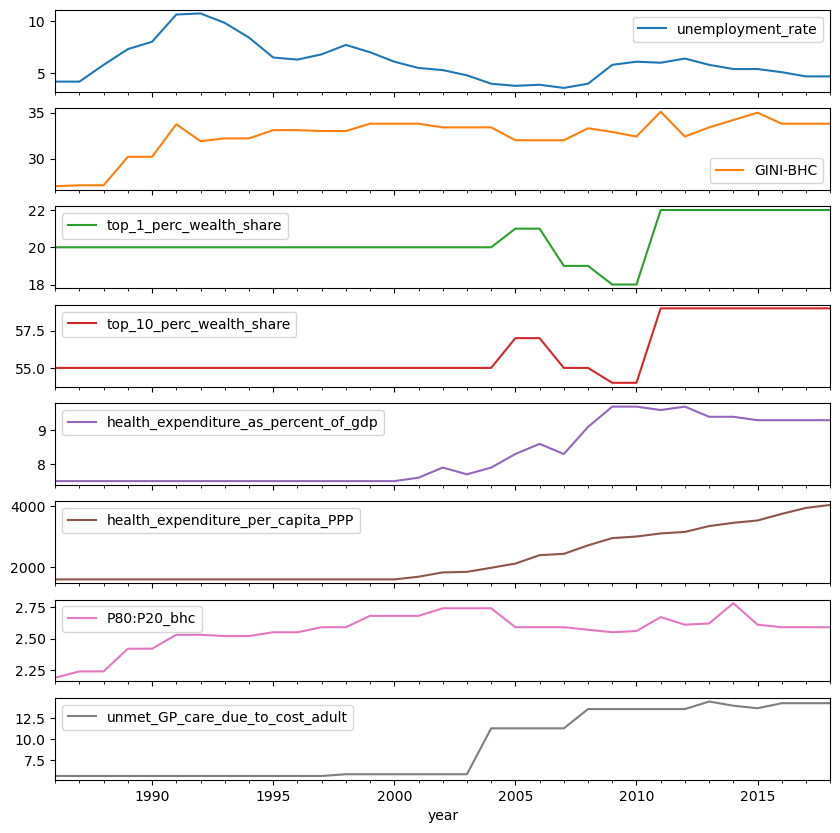

In [23]:
#Plotting economic data; 1986-2018.
data[['unemployment_rate', 'GINI-BHC','top_1_perc_wealth_share','top_10_perc_wealth_share','health_expenditure_as_percent_of_gdp','health_expenditure_per_capita_PPP','P80:P20_bhc','unmet_GP_care_due_to_cost_adult']].loc['1986':'2018'].plot(subplots=True, figsize = (10,10))

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

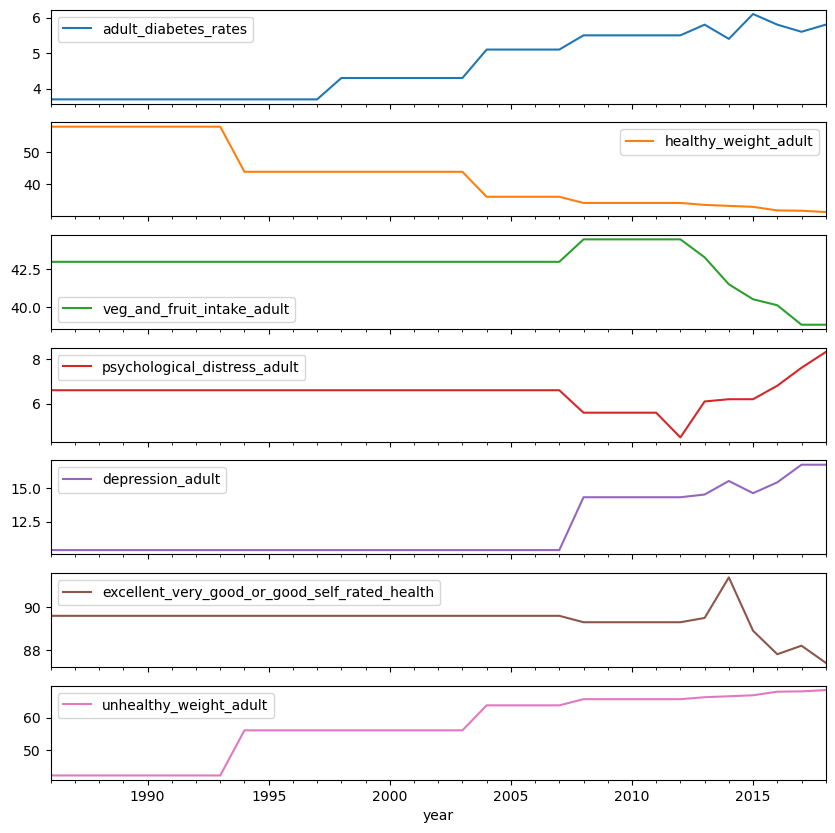

In [24]:
#plotting health data; 1986 - 2018.
data[['adult_diabetes_rates','healthy_weight_adult','veg_and_fruit_intake_adult','psychological_distress_adult','depression_adult','excellent_very_good_or_good_self_rated_health','unhealthy_weight_adult']].loc['1986':'2018'].plot(subplots=True, figsize = (10,10))

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

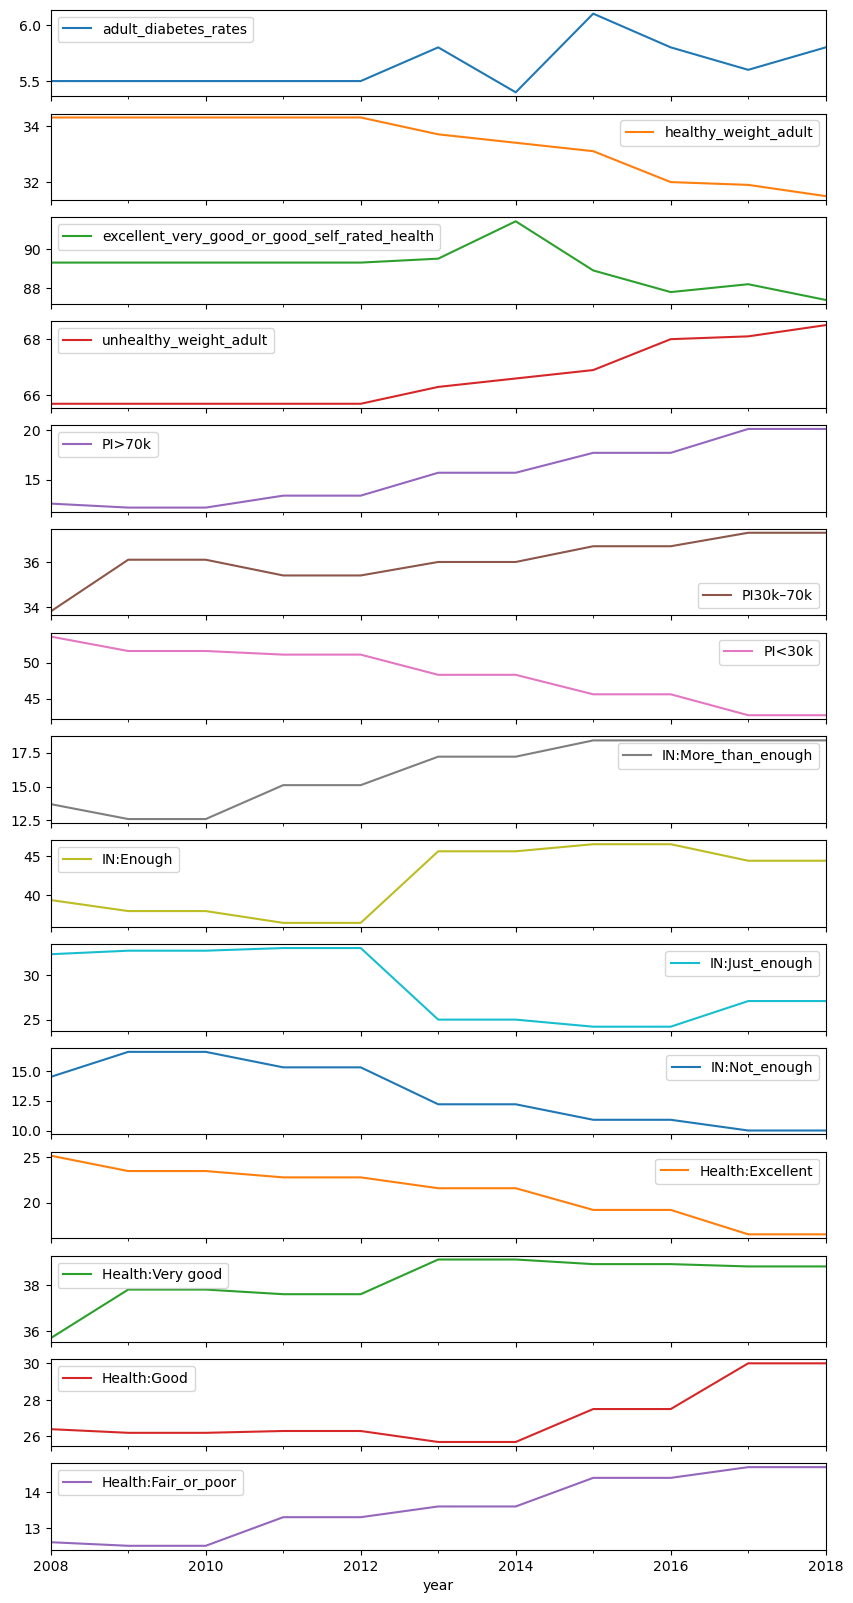

In [25]:
#plotting health data; 2008 - 2018.
datamerged[['adult_diabetes_rates','healthy_weight_adult','excellent_very_good_or_good_self_rated_health','unhealthy_weight_adult','PI>70k', 'PI30k–70k', 'PI<30k', 'IN:More_than_enough', 'IN:Enough', 'IN:Just_enough', 'IN:Not_enough', 'Health:Excellent', 'Health:Very good', 'Health:Good', 'Health:Fair_or_poor']].loc['2008':'2018'].plot(subplots=True, figsize = (10,20))

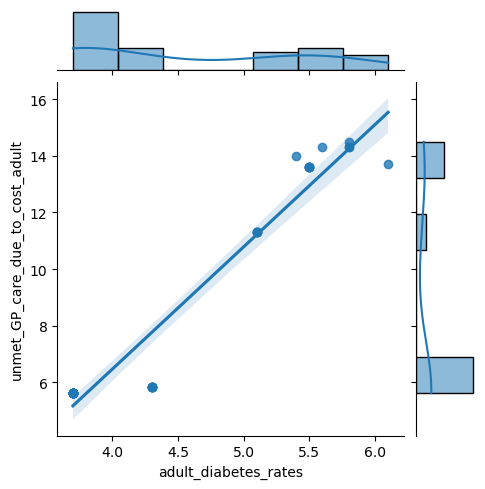

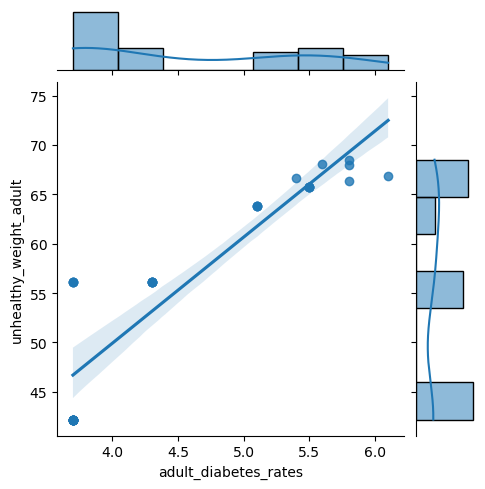

In [26]:
#Creating two joint plots which indicate the correlation between adult_diabetes_rates and 'unmet_GP_care_due_to_cost_adult'/'unhealthy_weight_adult'.
sns.jointplot("adult_diabetes_rates", "unmet_GP_care_due_to_cost_adult", data, kind='reg', height=5);
sns.jointplot("adult_diabetes_rates", "unhealthy_weight_adult", data, kind='reg', height=5);

[Text(0.5, 1.0, 'Relationships from 1986-2018')]

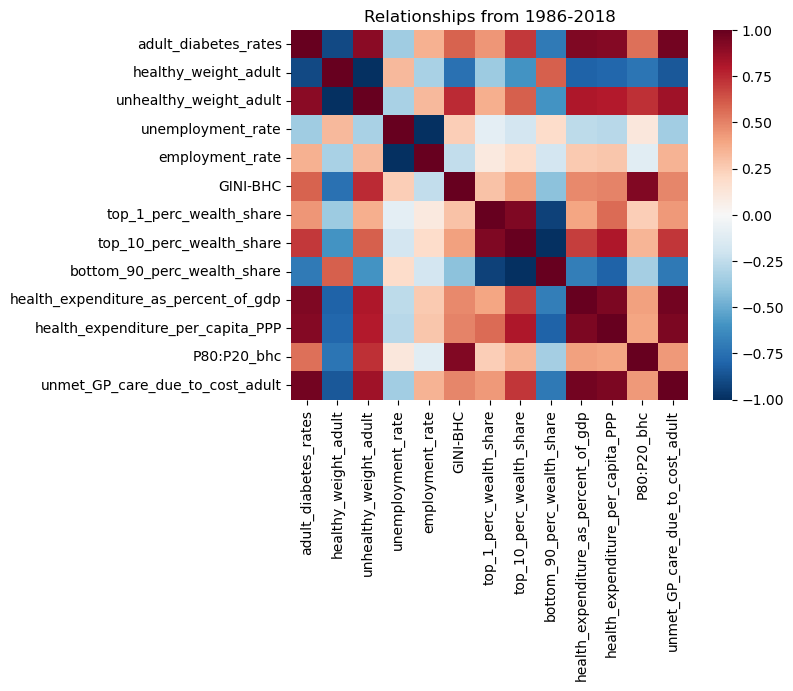

In [27]:
#Creating a correlation matrix of the data to display correlations between all variables (1986-2018):
corr = data[['adult_diabetes_rates','healthy_weight_adult','unhealthy_weight_adult','unemployment_rate','employment_rate', 'GINI-BHC','top_1_perc_wealth_share','top_10_perc_wealth_share','bottom_90_perc_wealth_share','health_expenditure_as_percent_of_gdp','health_expenditure_per_capita_PPP','P80:P20_bhc','unmet_GP_care_due_to_cost_adult']].corr()

#Plotting the correlations using the RdBu_r colourscheme, this colour scheme is great for showing off positive and negative correlations
sns.heatmap(corr, annot=False, cmap="RdBu_r").set(title = "Relationships from 1986-2018")

[Text(0.5, 1.0, 'Relationships 2005-2018')]

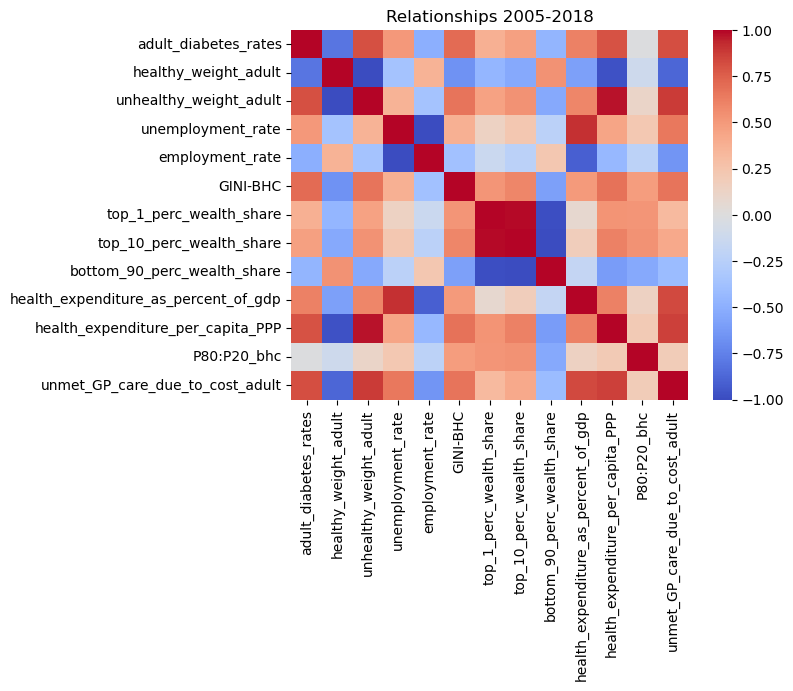

In [28]:
#Creating a correlation matrix of the data to display correlations between all variables (2005-2018).
corr2 = datapost2005[['adult_diabetes_rates','healthy_weight_adult','unhealthy_weight_adult','unemployment_rate','employment_rate', 'GINI-BHC','top_1_perc_wealth_share','top_10_perc_wealth_share','bottom_90_perc_wealth_share','health_expenditure_as_percent_of_gdp','health_expenditure_per_capita_PPP','P80:P20_bhc','unmet_GP_care_due_to_cost_adult']].corr()

#Plotting the correlations using the coolwarm colourscheme, this colour scheme is great for showing off positive and negative correlations
sns.heatmap(corr2, annot=False, cmap="coolwarm").set(title="Relationships 2005-2018")

In [29]:
#Creating a dataframe to display the correlations in a table format. 
corr_df = pd.DataFrame(corr) 
#This table displays the correlations along with the associated colour scheme from the above matrix. 
corr_table = corr_df.style.background_gradient(cmap='RdBu_r') 
corr_table.set_caption("Relationships from 1986-2018")
corr_table

,adult_diabetes_rates,healthy_weight_adult,unhealthy_weight_adult,unemployment_rate,employment_rate,GINI-BHC,top_1_perc_wealth_share,top_10_perc_wealth_share,bottom_90_perc_wealth_share,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,P80:P20_bhc,unmet_GP_care_due_to_cost_adult
adult_diabetes_rates,1.000000,-0.900778,0.900778,-0.357581,0.357581,0.590260,0.438480,0.705767,-0.705767,0.929991,0.921700,0.550728,0.967028
healthy_weight_adult,-0.900778,1.000000,-1.000000,0.320763,-0.320763,-0.746804,-0.360404,-0.595633,0.595633,-0.808581,-0.795263,-0.729448,-0.850344
unhealthy_weight_adult,0.900778,-1.000000,1.000000,-0.320763,0.320763,0.746804,0.360404,0.595633,-0.595633,0.808581,0.795263,0.729448,0.850344
unemployment_rate,-0.357581,0.320763,-0.320763,1.000000,-1.000000,0.248575,-0.098456,-0.187128,0.187128,-0.259051,-0.279375,0.113093,-0.344200
employment_rate,0.357581,-0.320763,0.320763,-1.000000,1.000000,-0.248575,0.098456,0.187128,-0.187128,0.259051,0.279375,-0.113093,0.344200
GINI-BHC,0.590260,-0.746804,0.746804,0.248575,-0.248575,1.000000,0.293906,0.407517,-0.407517,0.480021,0.492483,0.928612,0.490553
top_1_perc_wealth_share,0.438480,-0.360404,0.360404,-0.098456,0.098456,0.293906,1.000000,0.931802,-0.931802,0.396218,0.564746,0.249626,0.432964
top_10_perc_wealth_share,0.705767,-0.595633,0.595633,-0.187128,0.187128,0.407517,0.931802,1.000000,-1.000000,0.692712,0.812349,0.337547,0.716123
bottom_90_perc_wealth_share,-0.705767,0.595633,-0.595633,0.187128,-0.187128,-0.407517,-0.931802,-1.000000,1.000000,-0.692712,-0.812349,-0.337547,-0.716123
health_expenditure_as_percent_of_gdp,0.929991,-0.808581,0.808581,-0.259051,0.259051,0.480021,0.396218,0.692712,-0.692712,1.000000,0.939223,0.408020,0.961354


In [30]:
corr_df = pd.DataFrame(corr2)
corr_table2 = corr_df.style.background_gradient(cmap='coolwarm')
corr_table2.set_caption("Relationships from 2005-2018")
corr_table2

,adult_diabetes_rates,healthy_weight_adult,unhealthy_weight_adult,unemployment_rate,employment_rate,GINI-BHC,top_1_perc_wealth_share,top_10_perc_wealth_share,bottom_90_perc_wealth_share,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,P80:P20_bhc,unmet_GP_care_due_to_cost_adult
adult_diabetes_rates,1.000000,-0.808665,0.808665,0.504159,-0.504159,0.710370,0.380661,0.465230,-0.465230,0.611406,0.799222,-0.015338,0.814896
healthy_weight_adult,-0.808665,1.000000,-1.000000,-0.360012,0.360012,-0.665274,-0.453790,-0.538291,0.538291,-0.586939,-0.974443,-0.115593,-0.880778
unhealthy_weight_adult,0.808665,-1.000000,1.000000,0.360012,-0.360012,0.665274,0.453790,0.538291,-0.538291,0.586939,0.974443,0.115593,0.880778
unemployment_rate,0.504159,-0.360012,0.360012,1.000000,-1.000000,0.379397,0.136914,0.229378,-0.229378,0.910264,0.438909,0.226013,0.651156
employment_rate,-0.504159,0.360012,-0.360012,-1.000000,1.000000,-0.379397,-0.136914,-0.229378,0.229378,-0.910264,-0.438909,-0.226013,-0.651156
GINI-BHC,0.710370,-0.665274,0.665274,0.379397,-0.379397,1.000000,0.523112,0.589579,-0.589579,0.492254,0.678165,0.480935,0.665396
top_1_perc_wealth_share,0.380661,-0.453790,0.453790,0.136914,-0.136914,0.523112,1.000000,0.991401,-0.991401,0.072238,0.524443,0.521894,0.313526
top_10_perc_wealth_share,0.465230,-0.538291,0.538291,0.229378,-0.229378,0.589579,0.991401,1.000000,-1.000000,0.178958,0.613549,0.535267,0.419308
bottom_90_perc_wealth_share,-0.465230,0.538291,-0.538291,-0.229378,0.229378,-0.589579,-0.991401,-1.000000,1.000000,-0.178958,-0.613549,-0.535267,-0.419308
health_expenditure_as_percent_of_gdp,0.611406,-0.586939,0.586939,0.910264,-0.910264,0.492254,0.072238,0.178958,-0.178958,1.000000,0.614319,0.143390,0.832543


In [31]:
#Creating an additional corelation matrix for use in the results section (relationship between economic indicators and metabolic health outcomes).
corr3 = data[['adult_diabetes_rates','healthy_weight_adult','unhealthy_weight_adult','unemployment_rate','employment_rate', 'GINI-BHC','bottom_90_perc_wealth_share','P80:P20_bhc','top_10_perc_wealth_share']].corr()
corr_df = pd.DataFrame(corr3)
corr_table3 = corr_df.style.background_gradient(cmap='RdBu_r')
corr_table3.set_caption("Relationships between economic indicators and metabolic health outcomes")

#Creating an additional corelation matrix for use in the results section (relationship between government health expenditure and metabolic health outcomes).
corr4 = data[['adult_diabetes_rates','healthy_weight_adult','unhealthy_weight_adult','health_expenditure_as_percent_of_gdp','health_expenditure_per_capita_PPP']].corr()
corr_df = pd.DataFrame(corr4)
corr_table4 = corr_df.style.background_gradient(cmap='RdBu_r')
corr_table4.set_caption("Relationships between government health spending and metabolic health outcomes (1986-2018)")

#Creating an additional corelation matrix for use in the results section (relationship between government health expenditure and metabolic health outcomes after 2005).
corr5 = datapost2005[['adult_diabetes_rates','healthy_weight_adult','unhealthy_weight_adult','health_expenditure_as_percent_of_gdp','health_expenditure_per_capita_PPP']].corr()
corr_df = pd.DataFrame(corr5)
corr_table5 = corr_df.style.background_gradient(cmap='coolwarm')
corr_table5.set_caption("Relationships between government health spending and metabolic health outcomes (2005-2018)")

#Creating an additional corelation matrix for use in the results section (Relationships between government health spending and economic indicators (1986-2018)).
corr6 = data[['health_expenditure_as_percent_of_gdp','health_expenditure_per_capita_PPP','unemployment_rate','employment_rate', 'GINI-BHC','bottom_90_perc_wealth_share','P80:P20_bhc','top_10_perc_wealth_share']].corr()
corr_df = pd.DataFrame(corr6)
corr_table6 = corr_df.style.background_gradient(cmap='RdBu_r')
corr_table6.set_caption("Relationships between government health spending and economic indicators (1986-2018)")

#Creating an additional corelation matrix for use in the results section (Relationships between healthcare access and metabolic health outcomes (1986-2018)).
corr7 = data[['adult_diabetes_rates','healthy_weight_adult','unhealthy_weight_adult','unmet_GP_care_due_to_cost_adult']].corr()
corr_df = pd.DataFrame(corr7)
corr_table7 = corr_df.style.background_gradient(cmap='RdBu_r')
corr_table7.set_caption("Relationships between healthcare access and metabolic health outcomes (1986-2018)")

#Creating an additional corelation matrix for use in the results section (Relationships between healthcare access and metabolic health outcomes (2005-2018)).
corr8 = datapost2005[['adult_diabetes_rates','healthy_weight_adult','unhealthy_weight_adult','unmet_GP_care_due_to_cost_adult']].corr()
corr_df = pd.DataFrame(corr8)
corr_table8 = corr_df.style.background_gradient(cmap='coolwarm')
corr_table8.set_caption("Relationships between healthcare access and metabolic health outcomes (1986-2018)")

#Creating an additional corelation matrix for use in the results section (Relationships between healthcare access and metabolic health outcomes (2005-2018)).
corr9 = datamerged[['adult_diabetes_rates','healthy_weight_adult','excellent_very_good_or_good_self_rated_health','unhealthy_weight_adult','unemployment_rate','employment_rate','health_expenditure_as_percent_of_gdp', 'health_expenditure_per_capita_PPP','unmet_GP_care_due_to_cost_adult','PI>70k', 'PI30k–70k', 'PI<30k','IN:More_than_enough', 'IN:Enough', 'IN:Just_enough', 'IN:Not_enough', 'Health:Excellent', 'Health:Very good', 'Health:Good', 'Health:Fair_or_poor']].corr()
corr_df = pd.DataFrame(corr9)
corr_table9 = corr_df.style.background_gradient(cmap='PuOr')
corr_table9.set_caption("Relationships - General Social Survey + NZ health Survey Data (2008-2018)")

print('done')

done


# Analysis 
The purpose of this analysis is to determine the relationship between government spending, economic metrics and diabetes prevalence across New Zealand. Due to limitations around data collection before the early 2000s (discussed further in limitations section), the data analysis has been split into two sections, all dates (1986 to 2018) and after 2005 (2005-2018). Meaningful insights from this report demonstrate insights concerning the impact of healthcare spending and economic metrics on metabolic health outcomes. additional insights have been drawn which examine the relationship  between the economic metrics and government healthcare spending. 

#### Definitions
It is important to note that in this case, the term economic variables is referring specifically to the variables; 1. bottom_90_perc_wealth_share; 2. unemployment_rate/employment_rate; 3. P80:P20_bhc; 4. GINI-BHC. When referring to health economic variables this is referring to 'health_expenditure_per_capita_PPP' and 'health_expenditure_as_percent_of_gdp'. Furthermore, health variables refers to 'adult_diabetes_rates', 'unhealthy_weight_adult' and 'healthy_weight_adult'. While health care access is referring to 'unmet_GP_care_due_to_cost_adult'.

### Obesity as a benchmark for predicting diabetes:

In [32]:
x = data[['unhealthy_weight_adult']]
y = data[['adult_diabetes_rates']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     adult_diabetes_rates   R-squared:                       0.811
Model:                              OLS   Adj. R-squared:                  0.806
Method:                   Least Squares   F-statistic:                     150.6
Date:                  Sat, 06 May 2023   Prob (F-statistic):           3.10e-14
Time:                          14:26:26   Log-Likelihood:                -15.499
No. Observations:                    37   AIC:                             35.00
Df Residuals:                        35   BIC:                             38.22
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

As demonstrated in the linear regression model above, 81.1% of the variation of adult_diabetes_rates can be explained by the percentage of the population with overweight/obesity. This analysis is not unfounded as research demonstrates obesity is one of the best predictors of diabetes and is likely to be a causative factor (Klein et al., 2022)  

### 1. What is the relationship between economic indicators and metabolic health outcomes such as bodyweight and diabetes? 

The role of Economic trends on health outcomes can be demonstrated simply by the correlations between adult diabetes rates and economic variables as demonstrated below. Notably, the correlation between bodyweight and prevalence of diabetes is very high for unhealthy bodyweight (r = 0.90) and healthy bodyweight (r = -0.90), this is expected due to the causative role of obesity in diabetes prevalence (Klein et al., 2022). Due to this, bodyweight can be used as a benchmark for predicting diabetes. This analysis demonstrates that some economic variables do predict diabetes prevalence, such as the wealth share of the bottom 90% which strongly negatively predicts diabetes (r = -0.7), while the wealth share of the top 10% presents a strong positive correlation. This also makes intuitive sense due to the relationship between socioeconomic status and metabolic health outcomes identified in the research (Ali et al,. 2016; Ogunsina et al., 2018). It is important to note that not all economic metrics were strong predictors of diabetes prevalence, such as unemployment rate (r = -0.35); the GINI coefficient before housing costs (r = 0.59); Ratio of 80th to 20th percentile incomes (before housing costs) (r = 0.55). Furthermore, these correlations were generally weaker when examining the dataset after 2005. Overall, this indicates that economic metrics may predict the prevalence of diabetes to some degree, however, these measures are not able to account for all the variability observed in diabetes prevalence over this time period.

In [33]:
corr_table3

,adult_diabetes_rates,healthy_weight_adult,unhealthy_weight_adult,unemployment_rate,employment_rate,GINI-BHC,bottom_90_perc_wealth_share,P80:P20_bhc,top_10_perc_wealth_share
adult_diabetes_rates,1.000000,-0.900778,0.900778,-0.357581,0.357581,0.590260,-0.705767,0.550728,0.705767
healthy_weight_adult,-0.900778,1.000000,-1.000000,0.320763,-0.320763,-0.746804,0.595633,-0.729448,-0.595633
unhealthy_weight_adult,0.900778,-1.000000,1.000000,-0.320763,0.320763,0.746804,-0.595633,0.729448,0.595633
unemployment_rate,-0.357581,0.320763,-0.320763,1.000000,-1.000000,0.248575,0.187128,0.113093,-0.187128
employment_rate,0.357581,-0.320763,0.320763,-1.000000,1.000000,-0.248575,-0.187128,-0.113093,0.187128
GINI-BHC,0.590260,-0.746804,0.746804,0.248575,-0.248575,1.000000,-0.407517,0.928612,0.407517
bottom_90_perc_wealth_share,-0.705767,0.595633,-0.595633,0.187128,-0.187128,-0.407517,1.000000,-0.337547,-1.000000
P80:P20_bhc,0.550728,-0.729448,0.729448,0.113093,-0.113093,0.928612,-0.337547,1.000000,0.337547
top_10_perc_wealth_share,0.705767,-0.595633,0.595633,-0.187128,0.187128,0.407517,-1.000000,0.337547,1.000000


### 2. What impact does government health spending have on metabolic health outcomes such as bodyweight and diabetes? 

In [34]:
corr_table4

,adult_diabetes_rates,healthy_weight_adult,unhealthy_weight_adult,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP
adult_diabetes_rates,1.000000,-0.900778,0.900778,0.929991,0.921700
healthy_weight_adult,-0.900778,1.000000,-1.000000,-0.808581,-0.795263
unhealthy_weight_adult,0.900778,-1.000000,1.000000,0.808581,0.795263
health_expenditure_as_percent_of_gdp,0.929991,-0.808581,0.808581,1.000000,0.939223
health_expenditure_per_capita_PPP,0.921700,-0.795263,0.795263,0.939223,1.000000


In [35]:
x = data[['adult_diabetes_rates']]
y = data[['health_expenditure_as_percent_of_gdp']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                                     OLS Regression Results                                     
Dep. Variable:     health_expenditure_as_percent_of_gdp   R-squared:                       0.865
Model:                                              OLS   Adj. R-squared:                  0.861
Method:                                   Least Squares   F-statistic:                     224.0
Date:                                  Sat, 06 May 2023   Prob (F-statistic):           8.79e-17
Time:                                          14:26:26   Log-Likelihood:                -9.9831
No. Observations:                                    37   AIC:                             23.97
Df Residuals:                                        35   BIC:                             27.19
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                           coe

The relationships between government health spending and metabolic health outcomes such as diabetes and bodyweight are all strong. For example, the correlation between adult diabetes rates and health expenditure as a percentage (r = 0.92) or per capita (r = 0.92) is higher than the correlation between diabetes and bodyweight (r = 0.90), although only slightly. As outlined above, it is reasonable to use bodyweight as a benchmark for predicting diabetes prevalence due to the causative nature of obesity on diabetes (Klein et al., 2022), aswell as the high correlation coefficient present in this data. Although increased bodyweight is causative of Type Two Diabetes, it is not the only factor which leads to the development of Type Two Diabetes. Factors such as Socioeconomic Status and other Biopsychosocial factors should be considered in not only the prevention but also the risk assessment of Type Two Diabetes. Additionally, a linear regression analysis of health expenditure as a percentage of GDP is predicted strongly by the prevalence of diabetes (p = 0.000). Therefore, it is likely the case that government health spending is influenced by the prevalence of diabetes (and likely other chronic conditions). This regression model indicates that  the prevalence of diabetes explains 81.1% of the change in health expenditure as a percent of GDP.  

In [36]:
corr_table5

,adult_diabetes_rates,healthy_weight_adult,unhealthy_weight_adult,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP
adult_diabetes_rates,1.000000,-0.808665,0.808665,0.611406,0.799222
healthy_weight_adult,-0.808665,1.000000,-1.000000,-0.586939,-0.974443
unhealthy_weight_adult,0.808665,-1.000000,1.000000,0.586939,0.974443
health_expenditure_as_percent_of_gdp,0.611406,-0.586939,0.586939,1.000000,0.614319
health_expenditure_per_capita_PPP,0.799222,-0.974443,0.974443,0.614319,1.000000


As mentioned earlier, data after 2005 are generally more complete. Considering this it is important to examine at the correlations between these data are this date. The correlations are presented above, evidently, the relationships between health expenditure and diabetes prevalence are not as strong, however, the correlations are still strong (per capita(r) = 0.79) and moderate (percentage(r) = 0.61), this is also the case for the percentage of the population at an unhealthy weight (per capita(r) = 0.97; percentage(r) = 0.58). These data indicate that it is likely not that health expenditure predicts diabetes rates or obesity, but rather that these measures of population health influence government health spending. This is due to the overall impact of the burden of disease of diabetes (Duncan et al., 2020) and obesity (Fleming et al., 2013). Overall, it is likely that government expenditure is predicted to some degree to the prevalence of metabolic health conditions. 

### 3. What is the relationship between general economic indicators and government health spending?

The relationship between Government Health Expenditure and Economic indicators is generally weak. Our analyses found one exception, there is a moderate relationship between the share of wealth held by the top 10% and healthcare spending as a percentage of GDP (r = 0.69). Further, the relationship between health expenditure per capita and the share of wealth held by the top 10% is strong (r = 0.81). Considering this, it seems that government health spending is not well predicted by the economic situation of New Zealand. This may because that when it comes to cutting spending during economic downturns, healthcare spending would be very far down the list. Overall, it seems there is a weak relationship between the two groups of variables, and it is likely that there are better predictors of government health spending, such as the prevalance of diabetes which predicts health expenditure as a percentage (r = 0.92) or per capita (r = 0.92) much better than economic variables. 

In [37]:
corr_table6

,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,unemployment_rate,employment_rate,GINI-BHC,bottom_90_perc_wealth_share,P80:P20_bhc,top_10_perc_wealth_share
health_expenditure_as_percent_of_gdp,1.000000,0.939223,-0.259051,0.259051,0.480021,-0.692712,0.408020,0.692712
health_expenditure_per_capita_PPP,0.939223,1.000000,-0.279375,0.279375,0.492483,-0.812349,0.398246,0.812349
unemployment_rate,-0.259051,-0.279375,1.000000,-1.000000,0.248575,0.187128,0.113093,-0.187128
employment_rate,0.259051,0.279375,-1.000000,1.000000,-0.248575,-0.187128,-0.113093,0.187128
GINI-BHC,0.480021,0.492483,0.248575,-0.248575,1.000000,-0.407517,0.928612,0.407517
bottom_90_perc_wealth_share,-0.692712,-0.812349,0.187128,-0.187128,-0.407517,1.000000,-0.337547,-1.000000
P80:P20_bhc,0.408020,0.398246,0.113093,-0.113093,0.928612,-0.337547,1.000000,0.337547
top_10_perc_wealth_share,0.692712,0.812349,-0.187128,0.187128,0.407517,-1.000000,0.337547,1.000000


### 4. Does healthcare access predict the prevalence of metabolic health outcomes?

Out of all predictors for metabolic health outcomes, unmet general practitioner care due to cost predicted the prevalance of diabetes (r = 0.96) and overweight/obesity the best (r = 0.90). This makes sense due to the well documented correlations between socioeconomic status and the prevalence of metabolic disease (Ali et al., 2016; Ogunsina et al., 2018). However, similar to economic indicators predicting government health spending, in this relationship it is not clear which is causing the other, or if they are related at all. 

In [38]:
corr_table7

,adult_diabetes_rates,healthy_weight_adult,unhealthy_weight_adult,unmet_GP_care_due_to_cost_adult
adult_diabetes_rates,1.000000,-0.900778,0.900778,0.967028
healthy_weight_adult,-0.900778,1.000000,-1.000000,-0.850344
unhealthy_weight_adult,0.900778,-1.000000,1.000000,0.850344
unmet_GP_care_due_to_cost_adult,0.967028,-0.850344,0.850344,1.000000


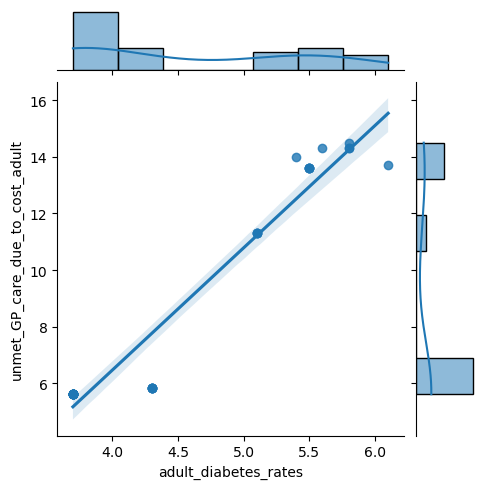

In [39]:
sns.jointplot("adult_diabetes_rates", "unmet_GP_care_due_to_cost_adult", data, kind='reg', height=5);

As shown in the table below, this relationship is still present and strong when examining data after 2005 (r = 0.81), this is also the case for predicting the percentage of the population of an unhealthy bodyweight (r = 0.88). One hypothesis for this relationship is that, as healthcare access declines, so does preventative care, which in the case of diabetes is very effective (Watson et al., 2014). 

In [40]:
corr_table8

,adult_diabetes_rates,healthy_weight_adult,unhealthy_weight_adult,unmet_GP_care_due_to_cost_adult
adult_diabetes_rates,1.000000,-0.808665,0.808665,0.814896
healthy_weight_adult,-0.808665,1.000000,-1.000000,-0.880778
unhealthy_weight_adult,0.808665,-1.000000,1.000000,0.880778
unmet_GP_care_due_to_cost_adult,0.814896,-0.880778,0.880778,1.000000


### Regression analyses comparing relationships between unmet needs to diabetes rates (after 2005 vs after 1986) 

In [41]:
x = data[['unmet_GP_care_due_to_cost_adult']]
y = data[['adult_diabetes_rates']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     adult_diabetes_rates   R-squared:                       0.935
Model:                              OLS   Adj. R-squared:                  0.933
Method:                   Least Squares   F-statistic:                     504.6
Date:                  Sat, 06 May 2023   Prob (F-statistic):           2.24e-22
Time:                          14:26:26   Log-Likelihood:                 4.2484
No. Observations:                    37   AIC:                            -4.497
Df Residuals:                        35   BIC:                            -1.275
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [42]:
data_after_2005 = data[data.index > pd.Timestamp('2005-01-01')]
# Define X and Y variables
x = data_after_2005[['unmet_GP_care_due_to_cost_adult']]
y = data_after_2005[['adult_diabetes_rates']]
X = sm.add_constant(x)
# Fit OLS model
model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     adult_diabetes_rates   R-squared:                       0.664
Model:                              OLS   Adj. R-squared:                  0.636
Method:                   Least Squares   F-statistic:                     23.72
Date:                  Sat, 06 May 2023   Prob (F-statistic):           0.000385
Time:                          14:26:26   Log-Likelihood:                 5.4283
No. Observations:                    14   AIC:                            -6.857
Df Residuals:                        12   BIC:                            -5.579
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

As expected, comparing the regression analyses examining the data after 2005 (which is more complete, and likely more accurate) shows that with more accurate data the relationship between unmet GP care due to cost and adult diabetes rates decreases. Given this, we can assume that there is a relationship between these variables, with unmet GP care due to cost explaining 63.6-66.4% of the variance of adult diabetes rates. Notably, the p-value for this regression is 0.00 indicating very high signifiance, therefore this analyses demonstrates high certainty that unmet GP care due to cost is a strong predictor of adult diabetes rates. Assuming this the post 2005 model is accurate, we can expect for every 1 unit increase in the percentage of the population which could not access GP care due to cost, the prevalence of diabetes will increase by ~0.2% (p = <0.05).

Considering these analyses, it is clear that socioeconomic status plays a substantial role in the prevalence of diabetes among New Zealanders. This is not unexpected due to significant research indicating socioeconomic status plays a key role in the risk of development of type two diabetes and other long term conditions (Ali et al., 2016; Ogunsina et al., 2018; Watson et al., 2014). 

In [43]:
corr_table9

,adult_diabetes_rates,healthy_weight_adult,excellent_very_good_or_good_self_rated_health,unhealthy_weight_adult,unemployment_rate,employment_rate,health_expenditure_as_percent_of_gdp,health_expenditure_per_capita_PPP,unmet_GP_care_due_to_cost_adult,PI>70k,PI30k–70k,PI<30k,IN:More_than_enough,IN:Enough,IN:Just_enough,IN:Not_enough,Health:Excellent,Health:Very good,Health:Good,Health:Fair_or_poor
adult_diabetes_rates,1.000000,-0.513414,-0.524939,0.513414,-0.164262,0.164262,-0.423911,0.516171,0.392363,0.599574,0.496127,-0.600970,0.643622,0.654212,-0.663198,-0.634021,-0.570205,0.489274,0.388195,0.643272
healthy_weight_adult,-0.513414,1.000000,0.647049,-1.000000,0.516863,-0.516863,0.548236,-0.953113,-0.753966,-0.955431,-0.776293,0.950325,-0.835295,-0.740142,0.700412,0.901582,0.945558,-0.620443,-0.854412,-0.908724
excellent_very_good_or_good_self_rated_health,-0.524939,0.647049,1.000000,-0.647049,0.346712,-0.346712,0.269406,-0.532893,-0.349173,-0.549632,-0.482065,0.557081,-0.351604,-0.171914,0.121618,0.423643,0.610581,-0.100014,-0.775336,-0.536292
unhealthy_weight_adult,0.513414,-1.000000,-0.647049,1.000000,-0.516863,0.516863,-0.548236,0.953113,0.753966,0.955431,0.776293,-0.950325,0.835295,0.740142,-0.700412,-0.901582,-0.945558,0.620443,0.854412,0.908724
unemployment_rate,-0.164262,0.516863,0.346712,-0.516863,1.000000,-1.000000,0.900900,-0.284646,-0.314858,-0.457199,0.027900,0.342781,-0.326287,-0.422701,0.294988,0.539857,0.326522,0.189836,-0.534871,-0.335975
employment_rate,0.164262,-0.516863,-0.346712,0.516863,-1.000000,1.000000,-0.900900,0.284646,0.314858,0.457199,-0.027900,-0.342781,0.326287,0.422701,-0.294988,-0.539857,-0.326522,-0.189836,0.534871,0.335975
health_expenditure_as_percent_of_gdp,-0.423911,0.548236,0.269406,-0.548236,0.900900,-0.900900,1.000000,-0.377735,-0.460555,-0.567210,-0.004434,0.438455,-0.574459,-0.659779,0.575235,0.718408,0.392615,-0.021823,-0.427661,-0.505012
health_expenditure_per_capita_PPP,0.516171,-0.953113,-0.532893,0.953113,-0.284646,0.284646,-0.377735,1.000000,0.763957,0.967340,0.863679,-0.984324,0.891730,0.731690,-0.730034,-0.893364,-0.980653,0.779922,0.794915,0.952441
unmet_GP_care_due_to_cost_adult,0.392363,-0.753966,-0.349173,0.753966,-0.314858,0.314858,-0.460555,0.763957,1.000000,0.758166,0.584886,-0.744683,0.751294,0.768890,-0.754816,-0.783834,-0.698367,0.690996,0.464633,0.697964
PI>70k,0.599574,-0.955431,-0.549632,0.955431,-0.457199,0.457199,-0.567210,0.967340,0.758166,1.000000,0.775249,-0.985075,0.925175,0.790176,-0.767179,-0.962258,-0.975042,0.687551,0.831199,0.971860


Notably, when merging the datasets GSS and The New Zealand Health Survey, it seems that obesity and diabetes no longer are strongly correlated. However, relationships between 'Healthy_weight_adult' and other variables such as 'IN:Not_enough' (r = 0.9) or health:Good (r = 0.85) are strong. As stated previously, in reality, high bodyweight or a high prevalence of overweight/obesity in the population is causative of diabetes to some degree. This indicates a key point that correlation does not equal causation. In our analysis there are many confounding factors, in particular, after the 2008 data there are only 10 data points for each variable (one for each year). Given the fact that in our dataset diabetes is generally correlated with the percentage of the population of a healthy weight, aswell as the causal relationship between diabetes and obesity (Klein et al., 2022), it is likely the case that the dataset after 2008 does not indicate the true relationships between the data due to a limited sample size. This means that our analysis after ~2008 has low statistical power due to the limited sample size.  

### Informing public discourse around the influence of socioeconomic status on health 

To effectively inform public discourse, this data can highlight Key findings which can be utilised in either political advocacy campaigns or public awareness campaigns. 

#### Political advocacy:
Considering the strong correlation between healthcare access and metabolic disease rates, a political advocacy campaign directed at raising access to basic healthcare checks for low socioeconomic status demographics would be fruitful. Due to the large burden of disease from metabolic diseases (Fleming et al., 2014; Watson et al., 2014), and considering the preventable nature of metabolic diseases such as diabetes (Fukuoka et al., 2015; Klein et al., 2022), significiant public health funding dedicated towards improving access and increasing preventative measures would be effective. Globally, implementation of preventative treatments has been effective over the short term (Kerrison et al., 2017). Health programs such as Te Tumu Waiora (Codrye et al., 2021) have been rolled out within New Zealand and aim to target general practices in low socioeconomic areas with free health coaching (nutrition and lifestyle support) aswell as mental wellbeing support. Considering the success of preventative programs in New Zealand, further funding, advocacy and funded healthcare rollouts may be highly effective at lowering diabetes prevalence and therefore, the financial burden of disease from diabetes. 

#### Public Awareness Campaigns
Diabetes Annual Reviews are promoted within New Zealand to provide full funding for all patients with diabetes to manage risk of the progression of the disease symptoms. This is done through the provision of hba1c tests (diagnosis severity tests), cholesterol tests (assessmennt of cardiovascular risk), healthy lifestyle advice (prevention advice) aswell as other assessments of risk. This is fully funded for all Diabetics in New Zealand (bpacNZ, 2021). Not all diabetics make use of these annual diabetes reviews, roughly 90% of diabetics nationally had their hba1c tested, while only 81% had their cholesterol tested (bpacNZ, 2015). 



### Limitations

Limitations of this analysis are limited to the amount of the datapoints, notably, after 2012 New Zealand Health Survey Survey became an annual process. Therefore, it is likely the case that correlations and statistics collected after this date will give stronger results. As displayed above, it seems the data are relatively clean for certain variables but not for others. Due to missing data for some variables such as; 'veg_and_fruit_intake_adult' and 'psychological_distress_adult', this makes it somewhat impractical and inaccurate to perform analyses on these data. However, many of the economic variables and health variables do contain complete data. Furthermore, this analyses did not examine the interaction between how economic downturns affect access to healthcare services broadly, in future analyses this should be considered. In our analyses, multiple regression would not be a useful test due to the small number of datapoints within the entire dataset. Further, although the data are more complete and needed less imputation due to less missing values. Considering this, conclusions drawn from data after 2008 or even 2005 have been interpreted with caution and may not present meaningful interpretations.


# Conclusion 

As outlined earlier, the primary purpose of this analysis is to analyse the relationships between socioeconomic indicators and health outcomes. Additionally, this report aimed to identify trends between the New Zealand governments healthcare spending and how this effects health outcomes. It is evident that metabolic diseases such as obesity and diabetes are complex and multifactorial, it is clear socioeconomic factors can play a key role in predicting health outcomes. It also seems to be the case that healthcare spending correlates strongly to the prevalence of metabolic diseases. Healthcare spending rises in proportion to the health burden of these diseases, given the fact that these diseases are preventable and it seems access to general pracititoners also predicts metabolic health outcomes. it is crucial to dedicate funding towards the development of improved access for low socioeconiomic status populations to basic healthcare such as yearly blood test screenings for Type Two Diabetes and other preventable metabolic diseases.  

### Key findings:

1. The best predictor of the prevalence of diabetes is the unmet general practitioner care due to cost. It is likely the case that those who are unable to access general practitioners due to cost are more likely to be at risk of developing Type Two Diabetes. 
2. Rising government healthcare expenditure is likely dictated by the rising prevelance of chronic metabolic diseases such as diabetes and obesity.  
3. Although, increased bodyweight is causative of Type Two Diabetes, it is not the only factor which leads to the development of Type Two Diabetes. Factors such as Socioeconomic Status and other Biopsychosocial factors should be considered in not only the prevention but also the risk assessment of Type Two Diabetes.  
4. The prevention of Type Two Diabetes through increasing healthcare access for low socioeconomic status populations at risk of developing Type Two Diabetes may be effective. 

### References:

Ali, M.K., Bhaskarapillai, B., Shivashankar, R., Mohan, D., Fatmi, Z.A., Pradeepa, R., Masood Kadir, M., Mohan, V., Tandon, N., Venkat Narayan, K., Prabhakaran, D., 2016. Socioeconomic status and cardiovascular risk in urban South Asia: The CARRS Study. European Journal of Preventive Cardiology 23, 408–419.. https://doi.org/10.1177/2047487315580891

bpacnz. (2015). Annual diabetes review report 2015. Retrieved April 8, 2023, from https://bpac.org.nz/Report/2015/August/AnnualDiabetes.aspx

bpacnz. (2021). The annual diabetes review: Screening, monitoring and managing complications. Diabetes Toolbox. Retrieved April 8, 2023, from https://bpac.org.nz/2021/diabetes-review.aspx

Codyre, D., Sharon, C., Disbury, L., Henry, R., & Crozier, D. (2021, 17/2/23). Te Tumu Waiora: The integrated primary mental health and addiction model. NZ Doctor, 31-36. https://www.nzdoctor.co.nz/sites/default/files/2021-06/f36ea340-f60a-475f-aa5d-ad21ca164752.pdf

Current health expenditure per capita (current US$) - New Zealand.The World Bank. (2023). Retrieved March 20, 2023, from https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD?locations=NZ&amp;most_recent_year_desc=true 

Duncan, B. B., Cousin, E., Naghavi, M., Afshin, A., França, E. B., Passos, V. M. D. A., Malta, D., Nascimento, B. R., & Schmidt, M. I.. (2020). The burden of diabetes and hyperglycemia in Brazil: a global burden of disease study 2017. Population Health Metrics, 18(S1). https://doi.org/10.1186/s12963-020-00209-0

Kerrison, G., Gillis, R. B., Jiwani, S. I., Alzahrani, Q., Kok, S., Harding, S. E., Shaw, I., & Adams, G. G.. (2017). The Effectiveness of Lifestyle Adaptation for the Prevention of Prediabetes in Adults: A Systematic Review. Journal of Diabetes Research, 2017, 1–20. https://doi.org/10.1155/2017/8493145

Klein, S., Gastaldelli, A., Yki-Järvinen, H., Scherer, P.E., 2022. Why does obesity cause diabetes?. Cell Metabolism 34, 11–20.. https://doi.org/10.1016/j.cmet.2021.12.012

New Zealand Health Survey. Ministry of Health NZ. (2022, November 18). Retrieved April 8, 2023, from https://www.health.govt.nz/nz-health-statistics/national-collections-and-surveys/surveys/new-zealand-health-survey 

Ng, M., Fleming, T., Robinson, M., Thomson, B., Graetz, N., Margono, C., Mullany, E. C., Biryukov, S., Abbafati, C., Abera, S. F., Abraham, J. P., Abu-Rmeileh, N. M. E., Achoki, T., Albuhairan, F. S., Alemu, Z. A., Alfonso, R., Ali, M. K., Ali, R., Guzman, N. A., … Gakidou, E.. (2014). Global, regional, and national prevalence of overweight and obesity in children and adults during 1980–2013: a systematic analysis for the Global Burden of Disease Study 2013. The Lancet, 384(9945), 766–781. https://doi.org/10.1016/s0140-6736(14)60460-8

Ogunsina, K., Dibaba, D. T., & Akinyemiju, T.. (2018). Association between life-course socio-economic status and prevalence of cardio-metabolic risk ractors in five middle-income countries. Journal of Global Health, 8(2). https://doi.org/10.7189/jogh.08.020405

StatsNZ. (2021). General Social Survey (GSS). General Social Survey (GSS) - Stats NZ DataInfo+. Retrieved April 8, 2023, from https://datainfoplus.stats.govt.nz/Item/nz.govt.stats/2ed50ad6-8ab8-47df-883d-210a51b50043 

StatsNZ. (2019, June 19). Wellbeing statistics: 2018: Stats NZ. Wellbeing statistics: 2018 | Stats NZ. Retrieved April 8, 2023, from https://www.stats.govt.nz/information-releases/wellbeing-statistics-2018 

Susnjak, T., Schumacher, C., Ali, A., Brook, A., Geertsema, P., Matthewson, J., Owens, R., & Smith, J. (2019). Shared Prosperity Index. Knowledge Exchange Hub, Massey University. Auckland, New Zealand. https://doi.org/10.33217/KEH/SharedProsperity/001/05.2019

Watson, P., Preston, L., Squires, H., Chilcott, J., & Brennan, A.. (2014). Modelling the Economics of Type 2 Diabetes Mellitus Prevention: A Literature Review of Methods. Applied Health Economics and Health Policy, 12(3), 239–253. https://doi.org/10.1007/s40258-014-0091-z

In [44]:
data.to_excel('unidataset.xlsx', index=True)

In [47]:
GSS.to_excel('GSSunidataset.xlsx', index=True)